In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data\GSM1586785_ScrH-12A_Exd_14mer_cg.csv')

We visualize the dataframe

In [3]:
df

,Unnamed: 0,Kmer,y_1,y_2,y_3,y_4,y_5,y_6,zC_1,zC_2,...,zW_76,zW_77,zW_78,y_79,y_80,y_81,y_82,y_83,y_84,relKa
0,0,AATGATTAATTACC,0.593697,-1.092779,0.309117,0.133525,0.023403,-0.157348,1.177586,-2.166888,...,-0.674709,10.019444,-1.012806,-0.790300,-0.112492,0.118705,0.237596,-0.009713,0.267886,1.000000
1,1,GGTAATTAATCATT,0.790300,-0.112492,0.118705,-0.237596,-0.009713,0.267886,2.591673,-3.422281,...,-0.986852,9.851130,-1.990198,-0.593697,-1.092779,0.309117,-0.133525,0.023403,-0.157348,1.000000
2,2,AATGATTAATTACT,0.593690,-1.092780,0.309116,0.133525,0.023403,-0.157348,1.177587,-2.166890,...,-0.839165,10.065669,-1.499679,-0.826872,-1.141872,0.500342,-0.143809,0.043456,0.095141,0.968830
3,3,AGTAATTAATCATT,0.826872,-1.141872,0.500342,0.143809,0.043456,0.095141,2.137980,-2.777053,...,-0.986851,9.851129,-1.990198,-0.593690,-1.092780,0.309116,-0.133525,0.023403,-0.157348,0.968830
4,4,AGGTAATTAATCAT,1.260372,-0.870861,0.397555,0.124897,0.053255,0.213696,1.977567,-2.851909,...,-0.960712,9.943948,-1.806082,0.336528,-0.596511,0.184099,-0.075285,0.032807,0.149085,0.968752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170576,170576,AAATAAATCAAAAA,0.876056,-1.165222,0.321638,0.106295,0.028863,-0.202603,1.139074,-1.939220,...,-0.779331,9.794168,-1.737971,0.085539,-0.955026,0.025427,0.256477,0.048950,0.080873,0.076591
170577,170577,TAATTGTTTTTTTT,0.585035,-0.150802,0.171198,-0.256918,0.058377,0.181906,1.209817,-3.391274,...,-1.162514,9.929123,-1.934750,-1.023253,-0.926061,0.372899,-0.098051,0.026279,-0.269782,0.073354
170578,170578,AAAAAAAACAATTA,1.023253,-0.926061,0.372899,0.098051,0.026279,-0.269782,1.151259,-1.899359,...,-0.832287,9.702945,-1.787255,-0.585035,-0.150802,0.171198,0.256918,0.058377,0.181906,0.073354
170579,170579,TTATTTTTTTAATT,-0.413908,-0.828290,0.190382,-0.246474,0.039222,0.122640,0.331353,-3.875098,...,-0.978912,9.863057,-1.994680,-0.735610,-1.194044,0.298711,-0.138674,0.028309,-0.129401,0.073150


In [4]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
df

,Kmer,y_1,y_2,y_3,y_4,y_5,y_6,zC_1,zC_2,zC_3,...,zW_76,zW_77,zW_78,y_79,y_80,y_81,y_82,y_83,y_84,relKa
0,AATGATTAATTACC,0.593697,-1.092779,0.309117,0.133525,0.023403,-0.157348,1.177586,-2.166888,-1.059702,...,-0.674709,10.019444,-1.012806,-0.790300,-0.112492,0.118705,0.237596,-0.009713,0.267886,1.000000
1,GGTAATTAATCATT,0.790300,-0.112492,0.118705,-0.237596,-0.009713,0.267886,2.591673,-3.422281,-1.331358,...,-0.986852,9.851130,-1.990198,-0.593697,-1.092779,0.309117,-0.133525,0.023403,-0.157348,1.000000
2,AATGATTAATTACT,0.593690,-1.092780,0.309116,0.133525,0.023403,-0.157348,1.177587,-2.166890,-1.059703,...,-0.839165,10.065669,-1.499679,-0.826872,-1.141872,0.500342,-0.143809,0.043456,0.095141,0.968830
3,AGTAATTAATCATT,0.826872,-1.141872,0.500342,0.143809,0.043456,0.095141,2.137980,-2.777053,-1.371144,...,-0.986851,9.851129,-1.990198,-0.593690,-1.092780,0.309116,-0.133525,0.023403,-0.157348,0.968830
4,AGGTAATTAATCAT,1.260372,-0.870861,0.397555,0.124897,0.053255,0.213696,1.977567,-2.851909,-1.221460,...,-0.960712,9.943948,-1.806082,0.336528,-0.596511,0.184099,-0.075285,0.032807,0.149085,0.968752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170576,AAATAAATCAAAAA,0.876056,-1.165222,0.321638,0.106295,0.028863,-0.202603,1.139074,-1.939220,-0.782830,...,-0.779331,9.794168,-1.737971,0.085539,-0.955026,0.025427,0.256477,0.048950,0.080873,0.076591
170577,TAATTGTTTTTTTT,0.585035,-0.150802,0.171198,-0.256918,0.058377,0.181906,1.209817,-3.391274,-1.164594,...,-1.162514,9.929123,-1.934750,-1.023253,-0.926061,0.372899,-0.098051,0.026279,-0.269782,0.073354
170578,AAAAAAAACAATTA,1.023253,-0.926061,0.372899,0.098051,0.026279,-0.269782,1.151259,-1.899359,-0.775374,...,-0.832287,9.702945,-1.787255,-0.585035,-0.150802,0.171198,0.256918,0.058377,0.181906,0.073354
170579,TTATTTTTTTAATT,-0.413908,-0.828290,0.190382,-0.246474,0.039222,0.122640,0.331353,-3.875098,-2.096984,...,-0.978912,9.863057,-1.994680,-0.735610,-1.194044,0.298711,-0.138674,0.028309,-0.129401,0.073150


## Baseline model

#### Splitting the dataset

First of all we split the data and we drop Kmer, this is a string so we cannot use it for machine learning purposes.

In [6]:
df.drop(columns = 'Kmer', inplace = True)

In [7]:
df

,y_1,y_2,y_3,y_4,y_5,y_6,zC_1,zC_2,zC_3,zC_4,...,zW_76,zW_77,zW_78,y_79,y_80,y_81,y_82,y_83,y_84,relKa
0,0.593697,-1.092779,0.309117,0.133525,0.023403,-0.157348,1.177586,-2.166888,-1.059702,-0.986852,...,-0.674709,10.019444,-1.012806,-0.790300,-0.112492,0.118705,0.237596,-0.009713,0.267886,1.000000
1,0.790300,-0.112492,0.118705,-0.237596,-0.009713,0.267886,2.591673,-3.422281,-1.331358,-0.674709,...,-0.986852,9.851130,-1.990198,-0.593697,-1.092779,0.309117,-0.133525,0.023403,-0.157348,1.000000
2,0.593690,-1.092780,0.309116,0.133525,0.023403,-0.157348,1.177587,-2.166890,-1.059703,-0.986851,...,-0.839165,10.065669,-1.499679,-0.826872,-1.141872,0.500342,-0.143809,0.043456,0.095141,0.968830
3,0.826872,-1.141872,0.500342,0.143809,0.043456,0.095141,2.137980,-2.777053,-1.371144,-0.839165,...,-0.986851,9.851129,-1.990198,-0.593690,-1.092780,0.309116,-0.133525,0.023403,-0.157348,0.968830
4,1.260372,-0.870861,0.397555,0.124897,0.053255,0.213696,1.977567,-2.851909,-1.221460,-0.880962,...,-0.960712,9.943948,-1.806082,0.336528,-0.596511,0.184099,-0.075285,0.032807,0.149085,0.968752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170576,0.876056,-1.165222,0.321638,0.106295,0.028863,-0.202603,1.139074,-1.939220,-0.782830,-1.156945,...,-0.779331,9.794168,-1.737971,0.085539,-0.955026,0.025427,0.256477,0.048950,0.080873,0.076591
170577,0.585035,-0.150802,0.171198,-0.256918,0.058377,0.181906,1.209817,-3.391274,-1.164594,-0.832287,...,-1.162514,9.929123,-1.934750,-1.023253,-0.926061,0.372899,-0.098051,0.026279,-0.269782,0.073354
170578,1.023253,-0.926061,0.372899,0.098051,0.026279,-0.269782,1.151259,-1.899359,-0.775374,-1.162514,...,-0.832287,9.702945,-1.787255,-0.585035,-0.150802,0.171198,0.256918,0.058377,0.181906,0.073354
170579,-0.413908,-0.828290,0.190382,-0.246474,0.039222,0.122640,0.331353,-3.875098,-2.096984,-0.362874,...,-0.978912,9.863057,-1.994680,-0.735610,-1.194044,0.298711,-0.138674,0.028309,-0.129401,0.073150


Now we divide into training and test data.

In [8]:
y = df['relKa'].to_numpy()
x = df.loc[:, df.columns != 'relKa'].to_numpy()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [10]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

#### Naive model

In [11]:
model = XGBRegressor()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [12]:
print('the MSE for non tuned model XGB Regressor is', MSE(y_test, predictions))

the MSE for non tuned model XGB Regressor is 0.0013181866451271926


The model fits the data pretty well, the MSE seems quite small.

#### Hyperparameters tuning

Now we will tune the hyperparameters to improve the model performances, we will consider the regressor that we obtain after hyperparameter tuning the baseline regressor.

In [13]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000],
           'lambda' : np.arange(0.5,2,0.2)
            }
model = XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator = model,
                         param_distributions = params,
                         scoring='neg_mean_squared_error',
                         n_iter=15,
                         verbose=10)
clf.fit(x_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START colsample_bylevel=0.4, colsample_bytree=0.5, lambda=2.4999999999999996, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5
[CV 1/5; 1/15] END colsample_bylevel=0.4, colsample_bytree=0.5, lambda=2.4999999999999996, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=  11.9s
[CV 2/5; 1/15] START colsample_bylevel=0.4, colsample_bytree=0.5, lambda=2.4999999999999996, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5
[CV 2/5; 1/15] END colsample_bylevel=0.4, colsample_bytree=0.5, lambda=2.4999999999999996, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=  11.7s
[CV 3/5; 1/15] START colsample_bylevel=0.4, colsample_bytree=0.5, lambda=2.4999999999999996, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5
[CV 3/5; 1/15] END colsample_bylevel=0.4, colsample_bytree=0.5, lambda=2.4999999999999996, learning_rate=0.1, max_dept

[CV 3/5; 5/15] END colsample_bylevel=0.7, colsample_bytree=0.7, lambda=2.6999999999999993, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.7999999999999999; total time= 8.5min
[CV 4/5; 5/15] START colsample_bylevel=0.7, colsample_bytree=0.7, lambda=2.6999999999999993, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.7999999999999999
[CV 4/5; 5/15] END colsample_bylevel=0.7, colsample_bytree=0.7, lambda=2.6999999999999993, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.7999999999999999; total time= 8.6min
[CV 5/5; 5/15] START colsample_bylevel=0.7, colsample_bytree=0.7, lambda=2.6999999999999993, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.7999999999999999
[CV 5/5; 5/15] END colsample_bylevel=0.7, colsample_bytree=0.7, lambda=2.6999999999999993, learning_rate=0.3, max_depth=20, n_estimators=1000, subsample=0.7999999999999999; total time= 8.5min
[CV 1/5; 6/15] START colsample_bylevel=0.7999999999999999, colsample_bytree=

[CV 2/5; 10/15] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, lambda=0.7, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.5; total time= 2.2min
[CV 3/5; 10/15] START colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, lambda=0.7, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.5
[CV 3/5; 10/15] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, lambda=0.7, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.5; total time= 2.2min
[CV 4/5; 10/15] START colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, lambda=0.7, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.5
[CV 4/5; 10/15] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, lambda=0.7, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.5; total time= 2.2min
[CV 5/5; 10/15] START colsample_bylevel=0.8999999999999999, colsample_bytree=0.7, lambda=0.7, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.

[CV 1/5; 15/15] END colsample_bylevel=0.7, colsample_bytree=0.5, lambda=3.8999999999999995, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=  26.8s
[CV 2/5; 15/15] START colsample_bylevel=0.7, colsample_bytree=0.5, lambda=3.8999999999999995, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5
[CV 2/5; 15/15] END colsample_bylevel=0.7, colsample_bytree=0.5, lambda=3.8999999999999995, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=  26.8s
[CV 3/5; 15/15] START colsample_bylevel=0.7, colsample_bytree=0.5, lambda=3.8999999999999995, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5
[CV 3/5; 15/15] END colsample_bylevel=0.7, colsample_bytree=0.5, lambda=3.8999999999999995, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=  26.9s
[CV 4/5; 15/15] START colsample_bylevel=0.7, colsample_bytree=0.5, lambda=3.8999999999999995, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.

In [14]:
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Best parameters: {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 15, 'learning_rate': 0.1, 'lambda': 3.8999999999999995, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.025225053574427447


In [15]:
predictions = clf.predict(x_test)

In [16]:
print('the MSE for tuned model XGB Regressor is', MSE(y_test, predictions))

the MSE for tuned model XGB Regressor is 0.0005287934425923489


### Features importance

In [11]:
model = XGBRegressor(subsample = 0.7, n_estimators = 1000, max_depth = 15, learning_rate = 0.1, reg_lambda = 3.8999,
                     colsample_bytree = 0.7, colsample_bylevel = 0.5)

In [26]:
model.fit(x_train, y_train)
predictions = model.predict(x_test)

[0.00063508 0.00048283 0.00074958 0.00047041 0.00052753 0.00068872
 0.00055149 0.00070202 0.00062631 0.00087299 0.00149044 0.00104346
 0.00093482 0.00198257 0.00091558 0.00079878 0.00114358 0.0006978
 0.00113119 0.00125822 0.00199444 0.00412398 0.0014116  0.00089716
 0.00178629 0.00161689 0.00159695 0.00128787 0.00135669 0.00265071
 0.00379541 0.00239945 0.00102576 0.00204374 0.00248111 0.00175079
 0.00160674 0.00393307 0.00160933 0.00307094 0.0032169  0.00120781
 0.00129693 0.00246873 0.0065111  0.00335185 0.00683105 0.00144478
 0.00186879 0.00178737 0.00125027 0.00225975 0.00136005 0.00107974
 0.00230964 0.0015718  0.00161097 0.00183146 0.00417426 0.0036072
 0.00294612 0.00607137 0.00292454 0.00373995 0.00510433 0.00085118
 0.00343225 0.00348573 0.00781835 0.00240094 0.00262377 0.00186521
 0.00267382 0.00151751 0.00172458 0.00407073 0.00131859 0.00112745
 0.00536356 0.00150909 0.00325685 0.00278176 0.00203093 0.00191603
 0.00371068 0.00322687 0.00161727 0.00294672 0.00326728 0.002911

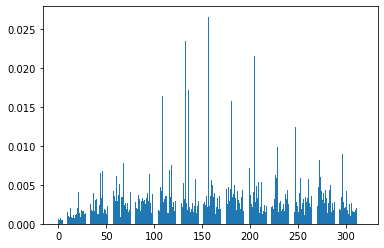

In [35]:
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

Some features have way less important than others

### PCA

In [12]:
pca = PCA(.95)

In [13]:
pca.fit(x_train)

PCA(n_components=0.95)

In [14]:
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [15]:
x_train.shape 

(119406, 44)

We are just left with 44 features, we performed a great dimensionality reduction.

In [16]:
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [17]:
print('the MSE for tuned model XGB Regressor when applied PCA is', MSE(y_test, predictions))

the MSE for tuned model XGB Regressor when applied PCA is 0.002659388081142156


The accuracy seems decreased, but what if we perform an hyperparameter tuning ?

In [18]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000],
           'lambda' : np.arange(0.5,2,0.2)
            }
model = XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator = model,
                         param_distributions = params,
                         scoring='neg_mean_squared_error',
                         n_iter=15,
                         verbose=10)
clf.fit(x_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, lambda=1.8999999999999997, learning_rate=0.3, max_depth=6, n_estimators=500, subsample=0.7999999999999999
[CV 1/5; 1/15] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, lambda=1.8999999999999997, learning_rate=0.3, max_depth=6, n_estimators=500, subsample=0.7999999999999999; total time=  45.8s
[CV 2/5; 1/15] START colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, lambda=1.8999999999999997, learning_rate=0.3, max_depth=6, n_estimators=500, subsample=0.7999999999999999
[CV 2/5; 1/15] END colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, lambda=1.8999999999999997, learning_rate=0.3, max_depth=6, n_estimators=500, subsample=0.7999999999999999; total time=  47.9s
[CV 3/5; 1/15] START colsample_bylevel=0.7, colsample_bytree=0.7999999999999999, lambda=1.8999999999999997, learning_rate=0.3, max_depth=6, n_estimators=50

[CV 3/5; 5/15] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, lambda=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8999999999999999; total time=   9.0s
[CV 4/5; 5/15] START colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, lambda=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8999999999999999
[CV 4/5; 5/15] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, lambda=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8999999999999999; total time=   9.0s
[CV 5/5; 5/15] START colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, lambda=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8999999999999999
[CV 5/5; 5/15] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, lambda=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8999999999999999; total time=   9.0s
[CV 1/5; 6/15] START colsample_bylevel=0.6, colsample_bytree=0.7999999999999999, 

[CV 3/5; 10/15] END colsample_bylevel=0.7, colsample_bytree=0.7, lambda=1.8999999999999997, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.8999999999999999; total time=  11.6s
[CV 4/5; 10/15] START colsample_bylevel=0.7, colsample_bytree=0.7, lambda=1.8999999999999997, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.8999999999999999
[CV 4/5; 10/15] END colsample_bylevel=0.7, colsample_bytree=0.7, lambda=1.8999999999999997, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.8999999999999999; total time=  11.5s
[CV 5/5; 10/15] START colsample_bylevel=0.7, colsample_bytree=0.7, lambda=1.8999999999999997, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.8999999999999999
[CV 5/5; 10/15] END colsample_bylevel=0.7, colsample_bytree=0.7, lambda=1.8999999999999997, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.8999999999999999; total time=  12.0s
[CV 1/5; 11/15] START colsample_bylevel=0.7, colsample_bytree=0.7, lambda=0.89999

[CV 1/5; 15/15] END colsample_bylevel=0.6, colsample_bytree=0.5, lambda=0.8999999999999999, learning_rate=0.1, max_depth=10, n_estimators=1000, subsample=0.7; total time= 2.7min
[CV 2/5; 15/15] START colsample_bylevel=0.6, colsample_bytree=0.5, lambda=0.8999999999999999, learning_rate=0.1, max_depth=10, n_estimators=1000, subsample=0.7
[CV 2/5; 15/15] END colsample_bylevel=0.6, colsample_bytree=0.5, lambda=0.8999999999999999, learning_rate=0.1, max_depth=10, n_estimators=1000, subsample=0.7; total time= 2.7min
[CV 3/5; 15/15] START colsample_bylevel=0.6, colsample_bytree=0.5, lambda=0.8999999999999999, learning_rate=0.1, max_depth=10, n_estimators=1000, subsample=0.7
[CV 3/5; 15/15] END colsample_bylevel=0.6, colsample_bytree=0.5, lambda=0.8999999999999999, learning_rate=0.1, max_depth=10, n_estimators=1000, subsample=0.7; total time= 2.7min
[CV 4/5; 15/15] START colsample_bylevel=0.6, colsample_bytree=0.5, lambda=0.8999999999999999, learning_rate=0.1, max_depth=10, n_estimators=1000, 

In [19]:
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.1, 'lambda': 1.8999999999999997, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.8999999999999999}
Lowest RMSE:  0.050224145447512865


Decrease in performaces.